<a href="https://colab.research.google.com/github/Turvashi/BA820-Fall-2021/blob/main/DFCI_datacleaning_UT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Mounting the Drive and saving them
from google.colab import drive
drive.mount('/gdrive')

df = pd.read_csv("/gdrive/Shareddrives/A5 - Capstone/Dataset_Demographics_1_6_22.csv")
df_q = pd.read_csv("/gdrive/Shareddrives/A5 - Capstone/Dataset_NPIQ_Answers_1_6_22.csv")

# #Geographic dataframe
# df = pd.read_csv("/content/drive/MyDrive/DFCI(File responses)/Please upload the dataset for Team A5! Thank You! (File responses)/Dataset_Demographics_1_6_22.csv")

# #dataframe questionnaire
# df_q = pd.read_csv("/content/drive/MyDrive/DFCI(File responses)/Please upload the dataset for Team A5! Thank You! (File responses)/Dataset_NPIQ_Answers_1_6_22.csv")

Mounted at /gdrive


In [3]:
# Calculating Patients age, and dropping the Birth Column
df['Age'] = 2022 - df['PatientBirthDTS']
df.drop(columns=['PatientBirthDTS'], axis = 1, inplace = True)

# Replacing NULL in SelfIdentifiedGender is Not Available
df['SelfIdentifiedGenderDSC'].replace(np.nan,'N/A', inplace = True)

# If language is English, then Interpreter not required. 
# If not English and has null value, replaced to N/A
df['PrimaryLanguageNM'].fillna('N/A', inplace = True)
df['InterpreterRequiredFLG'].fillna(0, inplace = True)
for i in range(len(df['InterpreterRequiredFLG'])):
    if df['PrimaryLanguageNM'][i] == 'English':
        if df['InterpreterRequiredFLG'][i] == 0:
            df['InterpreterRequiredFLG'][i] == 'N'
    elif df['PrimaryLanguageNM'][i] != 'English':
        if df['InterpreterRequiredFLG'][i] == 0:
            df['InterpreterRequiredFLG'][i] = 'N/A'

# Race, Ethnicity, and Miles filling in Null Value
df['RaceDSC'].replace(np.nan,'Other-Specify', inplace = True)
df['EthnicityNM'].replace(np.nan,'Other-Specify', inplace = True)
df['MilesFromLongwoodRange'].replace(np.nan,'N/A', inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
len(df_q.loc[df_q['RootQuestionnaireStatusDSC'] == 'Assigned'])

116392

In [ ]:
df_q.head()

,DFCIMRN,RootQuestionnaireID,RootQuestionnaireNM,RootAnswerID,QuestionID,QuestionTXT,AnswerTXT,AnswerMethodDSC,RootQuestionnaireStatusDSC
0,0x00000691457F4F0CE13E187B9AB4FDA6D42C86477529...,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,NaN,NaN,NaN,NaN,Assigned
1,0x00005CF59973A6AFAFC92F1BB42476B0395F127790FF...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x366B838AD00EE751BAD3D56FD9678A27618345584B9E...,1.400002e+09,"In general, please rate how well you carry out...",Excellent,MyChart,Completed
2,0x0000CCB6FBC0156D34FA585C68626CA1526DCEF17503...,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,NaN,NaN,NaN,NaN,Assigned
3,0x0000D57595EEA2C9FE1506820592427B38B3EC80A461...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x4E3107557F5EAC6A6F2F229FB9A417D19338D2919136...,1.242540e+05,How confident are you filling out medical forms?,Extremely,Welcome,Completed
4,0x0000D57595EEA2C9FE1506820592427B38B3EC80A461...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x4E3107557F5EAC6A6F2F229FB9A417D19338D2919136...,1.242550e+05,How confident are you in understanding medical...,Extremely,Welcome,Completed


In [ ]:
df['SelfIdentifiedGenderDSC'].unique

<bound method Series.unique of 0                            N/A
1         Choose not to disclose
2                            N/A
3                         Female
4                         Female
                   ...          
699427                       N/A
699428                       N/A
699429                       N/A
699430                       N/A
699431                       N/A
Name: SelfIdentifiedGenderDSC, Length: 699432, dtype: object>

In [ ]:
df.shape

(699432, 10)

In [ ]:
#numeric feature
df.describe(include=[np.number])

,Age
count,699432.000000
mean,61.657762
std,17.717233
min,0.000000
25%,52.000000
50%,65.000000
75%,75.000000
max,89.000000


In [ ]:
df.describe(include=[object])

,DFCIMRN,GenderDSC,SelfIdentifiedGenderDSC,InterpreterRequiredFLG,PrimaryLanguageNM,RaceDSC,EthnicityNM,MyChartStatusDSC,MilesFromLongwoodRange
count,699432,699432,699432,699432,699432,699432,699432,439673,699432
unique,699432,4,10,4,131,11,211,6,14
top,0xCD26170757F34A63A20CD26E4F68AAE35F603052D832...,Female,N/A,N,English,White or Caucasian,American,Activated,60+ mi
freq,1,427660,545077,450007,584426,274079,253002,253965,176404


In [ ]:
df.isnull().sum()

DFCIMRN                         0
GenderDSC                       0
SelfIdentifiedGenderDSC         0
InterpreterRequiredFLG          0
PrimaryLanguageNM               0
RaceDSC                         0
EthnicityNM                     0
MyChartStatusDSC           259759
MilesFromLongwoodRange          0
Age                             0
dtype: int64

MyChartStatusDSC 259759 null values


In [ ]:
df.columns

Index(['DFCIMRN', 'GenderDSC', 'SelfIdentifiedGenderDSC',
       'InterpreterRequiredFLG', 'PrimaryLanguageNM', 'RaceDSC', 'EthnicityNM',
       'MyChartStatusDSC', 'MilesFromLongwoodRange', 'Age'],
      dtype='object')

In [ ]:
df.nunique()

DFCIMRN                    699432
GenderDSC                       4
SelfIdentifiedGenderDSC        10
InterpreterRequiredFLG          4
PrimaryLanguageNM             131
RaceDSC                        11
EthnicityNM                   211
MyChartStatusDSC                6
MilesFromLongwoodRange         14
Age                            90
dtype: int64

In [ ]:
#check unique values in each column
{c:df[c].unique() for c in df.columns}

{'Age': array([72, 74, 62, 26, 56, 64, 44, 79, 39, 38, 80, 78, 69, 54, 70, 50, 63,
        87, 66, 75, 60, 41, 68, 61, 55, 40, 28, 29, 52, 81, 71, 76, 88, 32,
        21, 53, 23, 86, 36, 77, 20, 67, 84, 59, 12, 49, 65, 10, 73, 58, 31,
        57, 47, 85, 51, 34,  3,  2, 37, 43, 19, 82, 46, 27, 83, 30, 17, 35,
        16, 89, 45, 42, 48, 15,  1, 22, 33,  7,  9, 24,  8,  6, 25, 11, 13,
        14, 18,  4,  5,  0]),
 'DFCIMRN': array(['0xF357D6D5BAFA16FB147BE4E26B53962308784F2340E508F50EEFCC8D221E22D1',
        '0xCAB615644AA56EFDA9BBABE00E92F4C8F71217FB7E9B3C4C8625CCD4AFD71301',
        '0x9E5FB55AFEE474BB1D6EF40EA894204D3F599F446CA5C49369AC2E04A15AFA78',
        ...,
        '0xF72F20379332189B8AAD37B17F98790C32B11E204B39C69E094812DB2B215BB8',
        '0x7B8763532D1761055AF2B144F373EC756BD66596546108A31F10571B9385AF61',
        '0x4028934E0F930E997B8403A8726962359B362A4A6B54F62206FC3E027D6F8023'],
       dtype=object),
 'EthnicityNM': array(['Chinese', 'Unavailable', 'Other-Specify', 'A

'Activated', 'Inactivated', nan, 'Patient Declined',
'Pending Activation', 'Non Standard MyChart Status',
'Activation Code Generated, but Disabled'

https://mychart.genesishcs.org/MyChart/Authentication/Login?mode=stdfile&option=faq#TQ_disab

**Demographic Analysis**

Below we analyze the demographic data to find trends in MyChart statuses

**By Race:**

The data is heavily skewed towards the white race. The white and white or caucasian buckets together form over 70% of the demographic data. 

In [ ]:
#Changing Nan values in Mychart status to 0

#df.groupby(['MyChartStatusDSC','RaceDSC']).count()
#df['MyChartStatusDSC']=df['MyChartStatusDSC'].fillna(0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

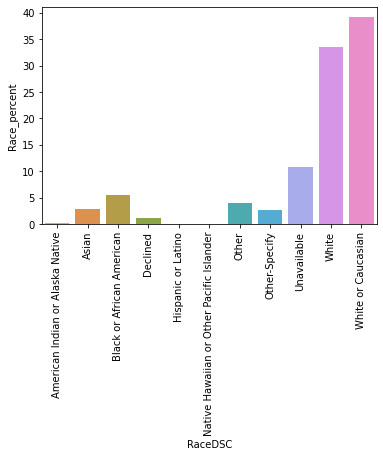

In [4]:
df_p = df.groupby("RaceDSC").count().reset_index()
df_p['Race_percent'] = (df_p["Age"]/df_p["Age"].sum()*100)
df_p
sns.barplot(x = 'RaceDSC', y='Race_percent', data = df_p)
plt.xticks(rotation = 'vertical')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

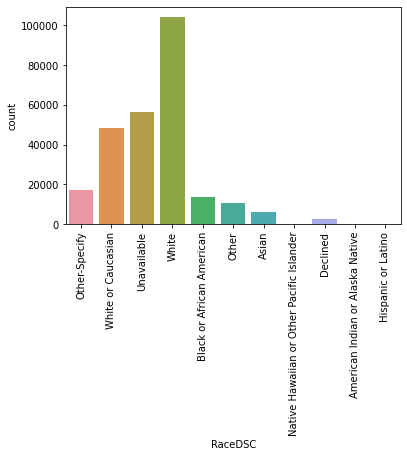

In [ ]:
# axes = df.plot.bar(rot=0, subplots=True)
# axes[1].legend(loc=2) 
sns.countplot(df_null['RaceDSC'])
plt.xticks(rotation = 'vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


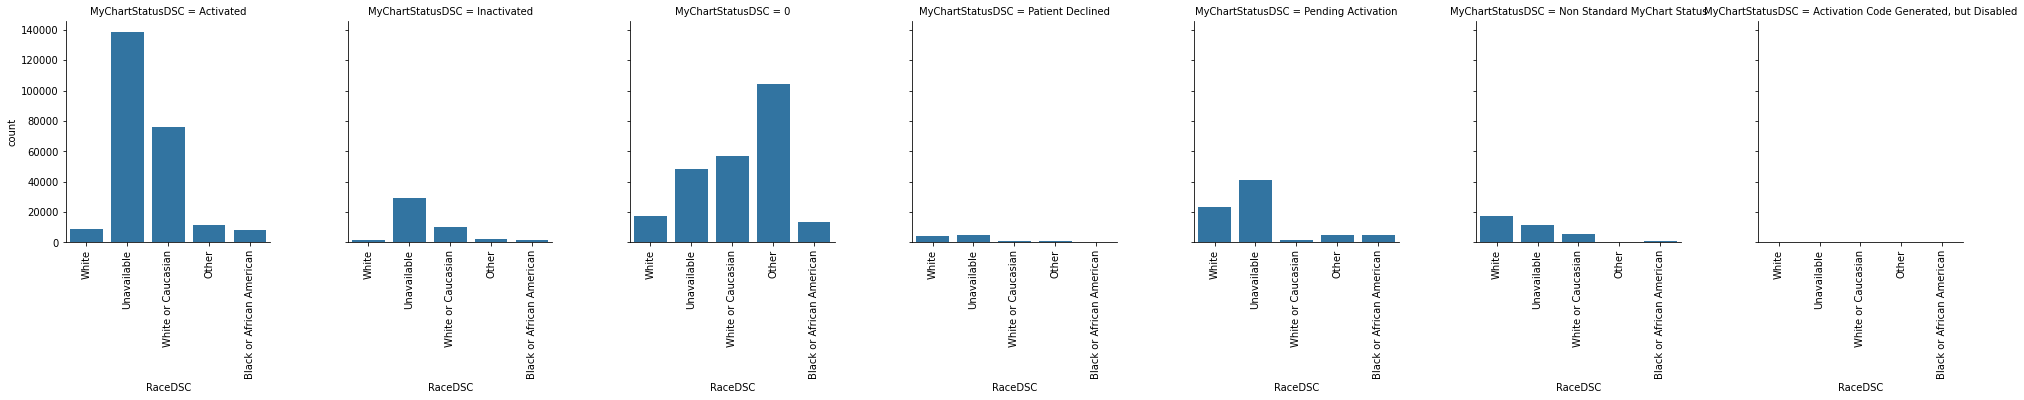

In [ ]:
# Count of race by MyChart Status
g = sns.FacetGrid(df, col ="MyChartStatusDSC", height = 4)
g.map(sns.countplot,'RaceDSC') 
rotation = 90 
for i, ax in enumerate(g.fig.axes):  
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)


In [ ]:
df_d = df.groupby('MyChartStatusDSC')['RaceDSC'].value_counts(normalize=True)
df_d = df_d.mul(100).rename('Percent').reset_index()
df_d


,MyChartStatusDSC,RaceDSC,Percent
0,0,White,40.107176
1,0,Unavailable,21.807137
2,0,White or Caucasian,18.676542
3,0,Other-Specify,6.657710
4,0,Black or African American,5.212524
...,...,...,...
65,Pending Activation,Declined,1.633229
66,Pending Activation,Other-Specify,0.304263
67,Pending Activation,American Indian or Alaska Native,0.122405
68,Pending Activation,Native Hawaiian or Other Pacific Islander,0.052459


Looking at race as a percentage of total instead of absolute numbers - 



*   The percentage of Black patients in the Activated status is <5% and ~20% in the Nan status bucket 
*   The overall percentage of Black patients in the data is 5%
*   The percentage of Black patients is also quite high for the disable status
*   The inactivated % for Black patients is lower indicating that when offered health access, it is often used






/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


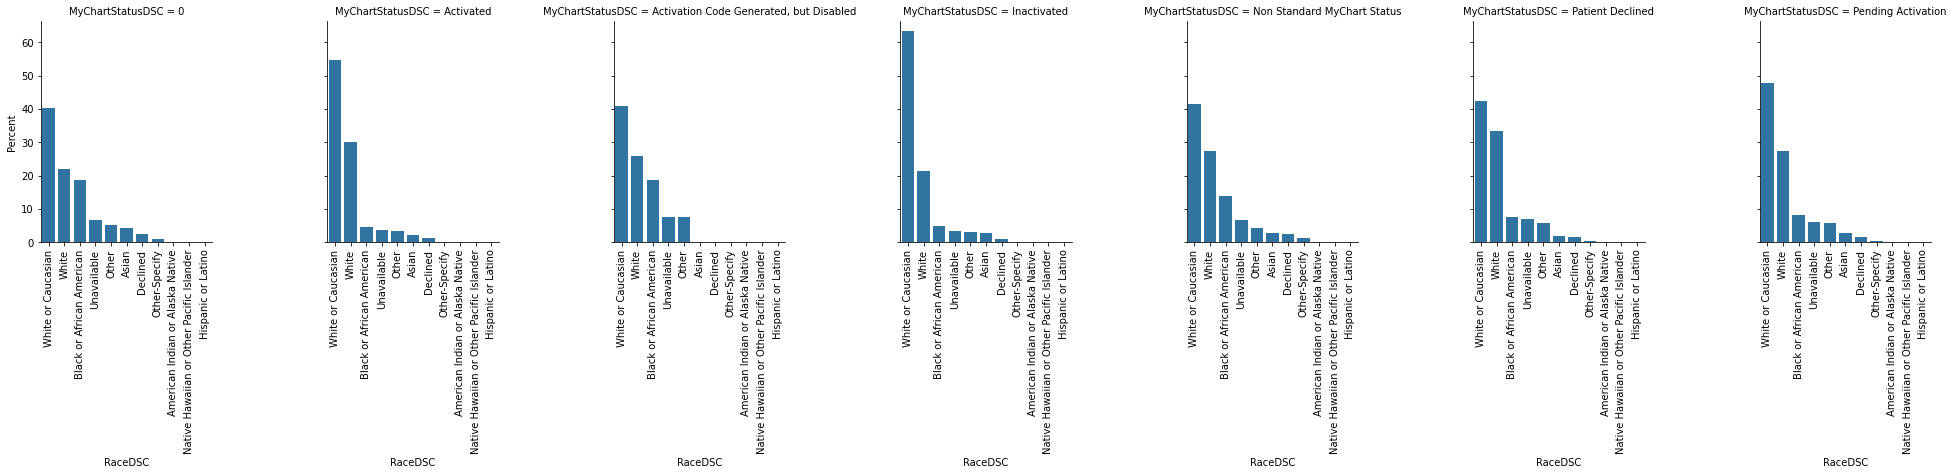

In [ ]:
# g = sns.catplot(x='MyChartStatusDSC', y='Percent', hue='RaceDSC', kind='bar', data=df_d)
# g.ax.set_ylim(0,100)

g = sns.FacetGrid(df_d, col ="MyChartStatusDSC", height = 4)
g.map(sns.barplot,'RaceDSC','Percent')
rotation = 90 
for i, ax in enumerate(g.fig.axes):  
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
    

**By Gender**

The data has about 60% females and 40% males overall. The other categories are negligible in size. 

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

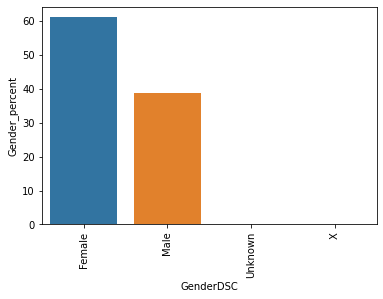

In [ ]:
df_p = df.groupby("GenderDSC").count().reset_index()
df_p['Gender_percent'] = (df_p["Age"]/df_p["Age"].sum()*100)
df_p
sns.barplot(x = 'GenderDSC', y='Gender_percent', data = df_p)
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

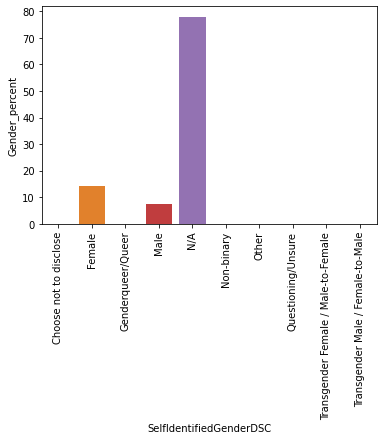

In [ ]:
df_p = df.groupby("SelfIdentifiedGenderDSC").count().reset_index()
df_p['Gender_percent'] = (df_p["Age"]/df_p["Age"].sum()*100)
df_p
sns.barplot(x = 'SelfIdentifiedGenderDSC', y='Gender_percent', data = df_p)
plt.xticks(rotation = 'vertical')

As a percentage, the proporation of females to males holds true to the overall data in most categories of mychart status. The only minor exception is inactivated. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


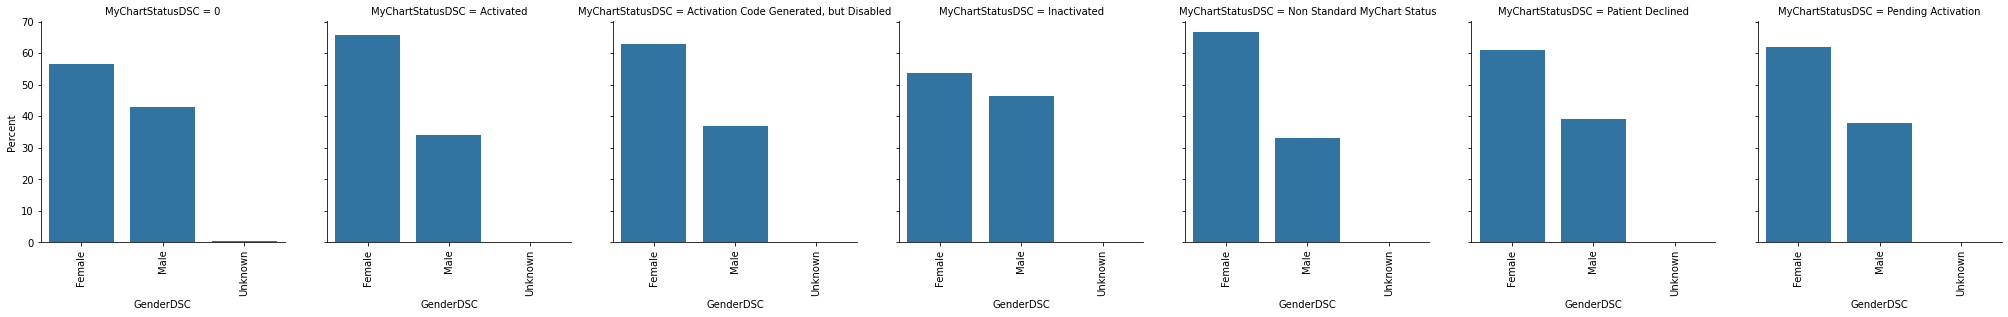

In [ ]:
df_d = df.groupby('MyChartStatusDSC')['GenderDSC'].value_counts(normalize=True)
df_d = df_d.mul(100).rename('Percent').reset_index()
g = sns.FacetGrid(df_d, col ="MyChartStatusDSC", height = 4)
g.map(sns.barplot,'GenderDSC','Percent')
rotation = 90 
for i, ax in enumerate(g.fig.axes):  
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)

**By need for an interpreter**

60% of the patients in the data do not need an interpreter

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

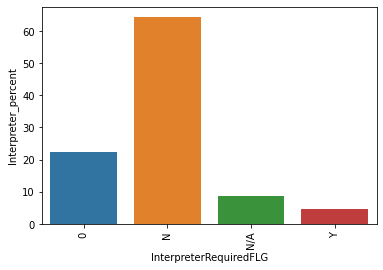

In [ ]:

df_p = df.groupby("InterpreterRequiredFLG").count().reset_index()
df_p['Interpreter_percent'] = (df_p["Age"]/df_p["Age"].sum()*100)
df_p
sns.barplot(x = 'InterpreterRequiredFLG', y='Interpreter_percent', data = df_p)
plt.xticks(rotation = 'vertical')



The Nan status has a much higher percentage of people who need interpreters ( ~ 20%) as compared to the overall percentage (~ 5%)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


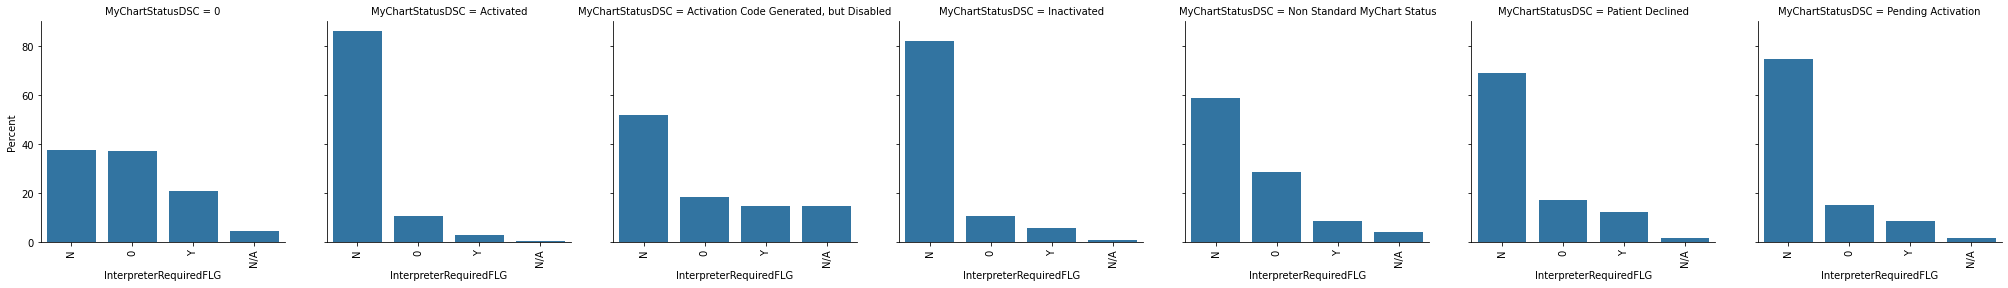

In [ ]:
df_d = df.groupby('MyChartStatusDSC')['InterpreterRequiredFLG'].value_counts(normalize=True)
df_d = df_d.mul(100).rename('Percent').reset_index()
g = sns.FacetGrid(df_d, col ="MyChartStatusDSC", height = 4)
g.map(sns.barplot,'InterpreterRequiredFLG','Percent')
rotation = 90 
for i, ax in enumerate(g.fig.axes):  
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)

**By distance from facility**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

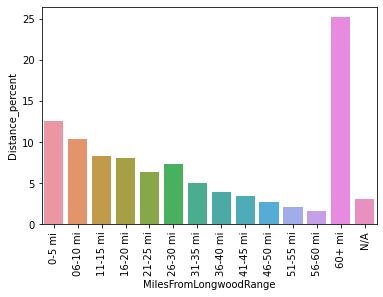

In [ ]:
#MilesFromLongwoodRange

df_p = df.groupby("MilesFromLongwoodRange").count().reset_index()
df_p['Distance_percent'] = (df_p["Age"]/df_p["Age"].sum()*100)
df_p
sns.barplot(x = 'MilesFromLongwoodRange', y='Distance_percent', data = df_p)
plt.xticks(rotation = 'vertical')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


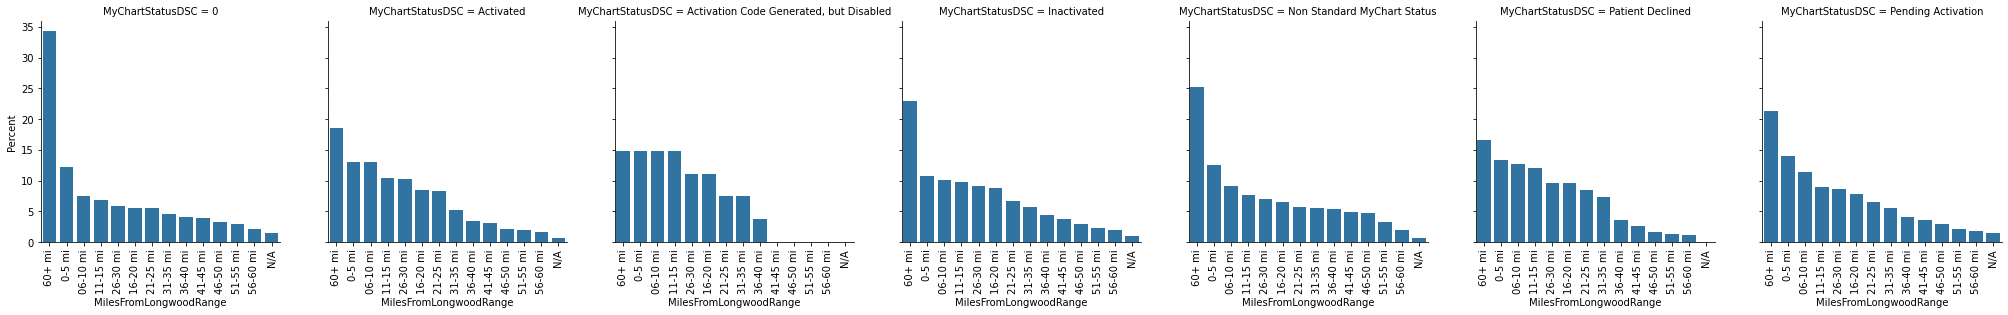

In [ ]:
df_d = df.groupby('MyChartStatusDSC')['MilesFromLongwoodRange'].value_counts(normalize=True)
df_d = df_d.mul(100).rename('Percent').reset_index()
g = sns.FacetGrid(df_d, col ="MyChartStatusDSC", height = 4)
g.map(sns.barplot,'MilesFromLongwoodRange','Percent')
rotation = 90 
for i, ax in enumerate(g.fig.axes):  
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)

**By age**

In [ ]:
#Creating age categories
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
df["age_group"] = pd.cut(df.Age, range(0, 105, 10), right=False, labels=labels)
df

,DFCIMRN,GenderDSC,SelfIdentifiedGenderDSC,InterpreterRequiredFLG,PrimaryLanguageNM,RaceDSC,EthnicityNM,MyChartStatusDSC,MilesFromLongwoodRange,Age,age_group
0,0xF357D6D5BAFA16FB147BE4E26B53962308784F2340E5...,Male,N/A,Y,Chinese-Cantonese,Asian,Chinese,Activated,06-10 mi,72,70 - 79
1,0xCAB615644AA56EFDA9BBABE00E92F4C8F71217FB7E9B...,Male,Choose not to disclose,N,Declined,Unavailable,Unavailable,Inactivated,11-15 mi,74,70 - 79
2,0x9E5FB55AFEE474BB1D6EF40EA894204D3F599F446CA5...,Female,N/A,N/A,N/A,Other-Specify,Other-Specify,0,60+ mi,62,60 - 69
3,0xD141C9EC891653F5446C9C9D1A1B3133D22038278669...,Female,Female,N,English,White or Caucasian,Unavailable,Activated,0-5 mi,26,20 - 29
4,0x0657FE0E68D45F5D88D551BE88DA940683B5E2A30F3C...,Female,Female,N,English,White,American,Activated,60+ mi,56,50 - 59
...,...,...,...,...,...,...,...,...,...,...,...
699427,0x0CBCF3AA529DBB90B67DDA3A65D29AA366CD335DB217...,Female,N/A,N,English,White or Caucasian,American,Activated,36-40 mi,75,70 - 79
699428,0xE7DABF03655C4BE55FB21DD2FA4BE57F3F766DE52E71...,Female,N/A,N,English,Unavailable,Declined,0,06-10 mi,88,80 - 89
699429,0xF72F20379332189B8AAD37B17F98790C32B11E204B39...,Male,N/A,0,English,White or Caucasian,Unavailable,0,60+ mi,81,80 - 89
699430,0x7B8763532D1761055AF2B144F373EC756BD665965461...,Male,N/A,N,English,Declined,Declined,Activated,06-10 mi,56,50 - 59


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

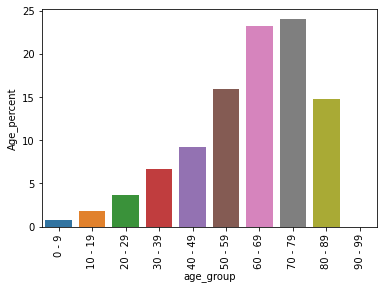

In [ ]:
df_p = df.groupby("age_group").count().reset_index()
df_p['Age_percent'] = (df_p["Age"]/df_p["Age"].sum()*100)
df_p
sns.barplot(x = 'age_group', y='Age_percent', data = df_p)
plt.xticks(rotation = 'vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


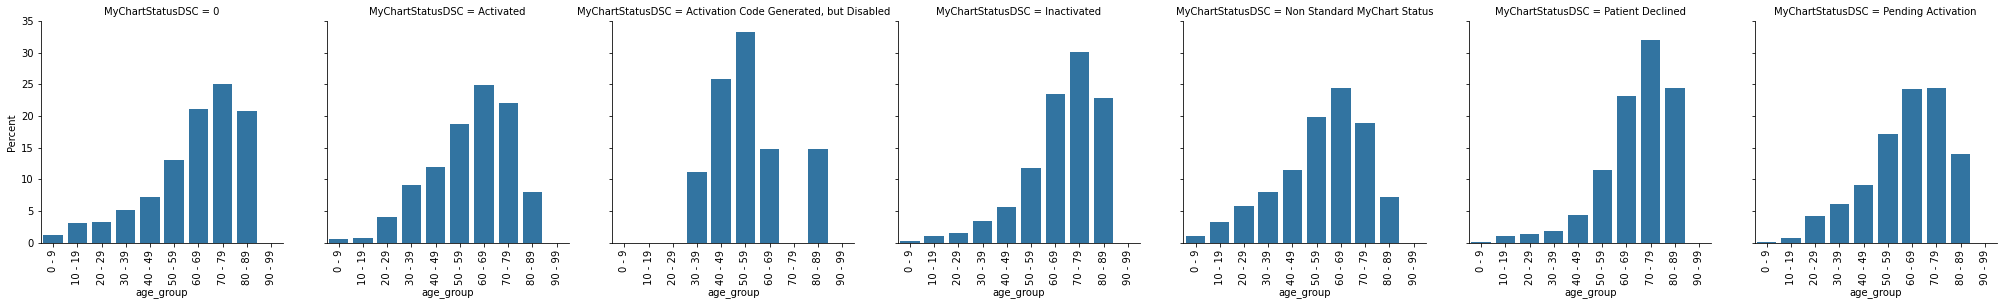

In [ ]:
df_d = df.groupby('MyChartStatusDSC')['age_group'].value_counts(normalize=True)
df_d = df_d.mul(100).rename('Percent').reset_index()
g = sns.FacetGrid(df_d, col ="MyChartStatusDSC", height = 4)
g.map(sns.barplot,'age_group','Percent')
rotation = 90 
for i, ax in enumerate(g.fig.axes):  
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)

**Null MyChart status analysis**

In [ ]:
df.groupby('MyChartStatusDSC').count()

,DFCIMRN,GenderDSC,SelfIdentifiedGenderDSC,InterpreterRequiredFLG,PrimaryLanguageNM,RaceDSC,EthnicityNM,MilesFromLongwoodRange,Age
MyChartStatusDSC,,,,,,,,,
0,259759,259759,259759,259759,259759,259759,259759,259759,259759
Activated,253965,253965,253965,253965,253965,253965,253965,253965,253965
"Activation Code Generated, but Disabled",27,27,27,27,27,27,27,27,27
Inactivated,46142,46142,46142,46142,46142,46142,46142,46142,46142
Non Standard MyChart Status,41865,41865,41865,41865,41865,41865,41865,41865,41865
Patient Declined,11893,11893,11893,11893,11893,11893,11893,11893,11893
Pending Activation,85781,85781,85781,85781,85781,85781,85781,85781,85781


In [ ]:
df_null = df[df['MyChartStatusDSC'] == 0]
df_null.groupby('RaceDSC').count()


,DFCIMRN,GenderDSC,SelfIdentifiedGenderDSC,InterpreterRequiredFLG,PrimaryLanguageNM,EthnicityNM,MyChartStatusDSC,MilesFromLongwoodRange,Age
RaceDSC,,,,,,,,,
American Indian or Alaska Native,250,250,250,250,250,250,250,250,250
Asian,6124,6124,6124,6124,6124,6124,6124,6124,6124
Black or African American,13540,13540,13540,13540,13540,13540,13540,13540,13540
Declined,2361,2361,2361,2361,2361,2361,2361,2361,2361
Hispanic or Latino,7,7,7,7,7,7,7,7,7
Native Hawaiian or Other Pacific Islander,98,98,98,98,98,98,98,98,98
Other,10743,10743,10743,10743,10743,10743,10743,10743,10743
Other-Specify,17294,17294,17294,17294,17294,17294,17294,17294,17294
Unavailable,56646,56646,56646,56646,56646,56646,56646,56646,56646


In [ ]:
df_q.shape

(452179, 9)

In [ ]:
df_q = df_q.sort_values(by=['DFCIMRN','QuestionID'])

In [ ]:
df_q.nunique()

DFCIMRN                       138859
RootQuestionnaireID                2
RootQuestionnaireNM                2
RootAnswerID                   40115
QuestionID                        10
QuestionTXT                       10
AnswerTXT                         58
AnswerMethodDSC                    3
RootQuestionnaireStatusDSC         7
dtype: int64

In [ ]:
# using issubset() to
# check subset of list
flag = 0
if(set(df_q['DFCIMRN']).issubset(df['DFCIMRN'])):
    flag = 1
 
# printing result
if (flag):
    print("Yes, list is subset of other.")
else:
    print("No, list is not subset of other.")

Yes, list is subset of other.


In [ ]:
df_q.head()

,DFCIMRN,RootQuestionnaireID,RootQuestionnaireNM,RootAnswerID,QuestionID,QuestionTXT,AnswerTXT,AnswerMethodDSC,RootQuestionnaireStatusDSC
1203,0x0000000399C6AEA5AD0C709A9BC331A3ED6494702BD1...,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,NaN,NaN,NaN,NaN,Assigned
0,0x00000691457F4F0CE13E187B9AB4FDA6D42C86477529...,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,NaN,NaN,NaN,NaN,Assigned
1172,0x00005CF59973A6AFAFC92F1BB42476B0395F127790FF...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x366B838AD00EE751BAD3D56FD9678A27618345584B9E...,124254.0,How confident are you filling out medical forms?,Extremely,MyChart,Completed
1359,0x00005CF59973A6AFAFC92F1BB42476B0395F127790FF...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x366B838AD00EE751BAD3D56FD9678A27618345584B9E...,124255.0,How confident are you in understanding medical...,Extremely,MyChart,Completed
983,0x00005CF59973A6AFAFC92F1BB42476B0395F127790FF...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x366B838AD00EE751BAD3D56FD9678A27618345584B9E...,124256.0,Did you complete this survey on your own?,Y,MyChart,Completed


In [ ]:
#check unique values in each column
df_q.columns

Index(['DFCIMRN', 'RootQuestionnaireID', 'RootQuestionnaireNM', 'RootAnswerID',
       'QuestionID', 'QuestionTXT', 'AnswerTXT', 'AnswerMethodDSC',
       'RootQuestionnaireStatusDSC'],
      dtype='object')

In [ ]:
#check unique values in each column
{c:df_q[c].unique() for c in df_q.columns}

{'AnswerMethodDSC': array([nan, 'MyChart', 'Welcome', 'EpicCare'], dtype=object),
 'AnswerTXT': array([nan, 'Extremely', 'Y', 'No', 'Not at all difficult', 'Excellent',
        '34.9', '50.8', 'Very Good', '45.8', '32.4', 'Quite a bit',
        'Somewhat', 'Yes', 'Not very difficult', 'Good', '19.9', '33.8',
        '53.3', '29.6', '41.1', 'A little bit', '44.9', '59', '57.7',
        '67.6', '48.3', '39.8', '67.7', '62.5', '54.1', 'Fair', '37.4',
        '47.7', '56', '43.5', '16.2', '31.3', 'Somewhat difficult', '38.8',
        '26.7', 'Incomplete', 'N', 'A family member or friend', '36.3',
        'Not at all', 'Very difficult', '25.1', 'Poor', '61.9',
        'Extremely difficult', '28.4', '21.2', '23.5', '42.3', 'Other',
        'A translator', 'A clinic staff member',
        'A health care professional'], dtype=object),
 'DFCIMRN': array(['0x0000000399C6AEA5AD0C709A9BC331A3ED6494702BD1D129D8C817A0257A1462',
        '0x00000691457F4F0CE13E187B9AB4FDA6D42C8647752909B8F71F9DBD8F6BD

In [ ]:
df_q.head()

,DFCIMRN,RootQuestionnaireID,RootQuestionnaireNM,RootAnswerID,QuestionID,QuestionTXT,AnswerTXT,AnswerMethodDSC,RootQuestionnaireStatusDSC
1203,0x0000000399C6AEA5AD0C709A9BC331A3ED6494702BD1...,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,NaN,NaN,NaN,NaN,Assigned
0,0x00000691457F4F0CE13E187B9AB4FDA6D42C86477529...,1461111101,ONC DF PATIENT INTAKE SURVEY,NaN,NaN,NaN,NaN,NaN,Assigned
1172,0x00005CF59973A6AFAFC92F1BB42476B0395F127790FF...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x366B838AD00EE751BAD3D56FD9678A27618345584B9E...,124254.0,How confident are you filling out medical forms?,Extremely,MyChart,Completed
1359,0x00005CF59973A6AFAFC92F1BB42476B0395F127790FF...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x366B838AD00EE751BAD3D56FD9678A27618345584B9E...,124255.0,How confident are you in understanding medical...,Extremely,MyChart,Completed
983,0x00005CF59973A6AFAFC92F1BB42476B0395F127790FF...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x366B838AD00EE751BAD3D56FD9678A27618345584B9E...,124256.0,Did you complete this survey on your own?,Y,MyChart,Completed


In [ ]:
#if drop those with null QuestionID 
df_qs = df_q.dropna(subset=['QuestionID'],inplace=False)

In [ ]:
df_q.shape

(452179, 9)

In [ ]:
df_qs.shape

(333676, 9)

In [ ]:
df_qs.isnull().sum()

DFCIMRN                          0
RootQuestionnaireID              0
RootQuestionnaireNM              0
RootAnswerID                     0
QuestionID                       0
QuestionTXT                      0
AnswerTXT                     5080
AnswerMethodDSC                206
RootQuestionnaireStatusDSC       0
dtype: int64

In [ ]:
df_qs['DFCIMRN'].nunique()

36695

In [ ]:
#Check and make sure question id and Question Text are 1v1 and find how they are paired
for id in df_qs['QuestionID'].unique():
  print({id:(df_qs[df_qs['QuestionID']==id]['QuestionTXT'].unique())[0]})

{124254.0: 'How confident are you filling out medical forms?'}
{124255.0: 'How confident are you in understanding medical statistics?'}
{124256.0: 'Did you complete this survey on your own?'}
{124259.0: 'Do you currently live alone?'}
{124262.0: "How difficult is it for you (your family) to meet monthly payments on your (family's) bills?"}
{1400001772.0: 'In general, how would you rate your satisfaction with your social activities and relationships?'}
{1400001776.0: 'In general, please rate how well you carry out your usual social activities and roles. (This includes activities at home, at work and in your community, and responsibilities as a parent, child, spouse, employee, friend, etc.)'}
{1400001787.0: 'PROMs PROMIS Global Health Short Form Score (Physical)'}
{1400001788.0: 'PROMs PROMIS Global Health Short Form Score (Mental)'}
{124257.0: 'Who assisted you with completing this survey?'}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

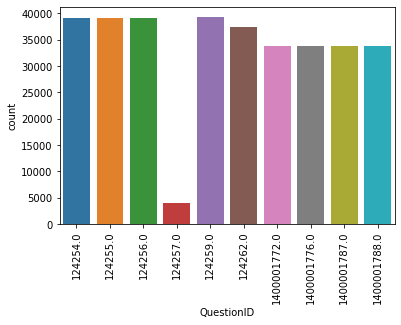

In [ ]:
sns.countplot(df_qs['QuestionID'])
plt.xticks(rotation = 'vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


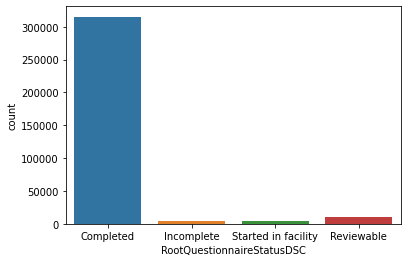

In [ ]:
sns.countplot(df_qs['RootQuestionnaireStatusDSC'])

In [ ]:
#One example of some people may have answered the questionnaire more than once and provided different answers at different times
df_qs[df_qs['DFCIMRN']=='0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5DE93FD1EA1D07DE81716']

,DFCIMRN,RootQuestionnaireID,RootQuestionnaireNM,RootAnswerID,QuestionID,QuestionTXT,AnswerTXT,AnswerMethodDSC,RootQuestionnaireStatusDSC
98332,0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x00F7F681624478A53929EBAB0DEC3484C16D6CB11EBA...,1.242540e+05,How confident are you filling out medical forms?,Extremely,Welcome,Completed
160162,0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x00F7F681624478A53929EBAB0DEC3484C16D6CB11EBA...,1.242540e+05,How confident are you filling out medical forms?,Extremely,MyChart,Completed
98379,0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x00F7F681624478A53929EBAB0DEC3484C16D6CB11EBA...,1.242550e+05,How confident are you in understanding medical...,Extremely,MyChart,Completed
99327,0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x00F7F681624478A53929EBAB0DEC3484C16D6CB11EBA...,1.242550e+05,How confident are you in understanding medical...,Extremely,Welcome,Completed
98380,0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x00F7F681624478A53929EBAB0DEC3484C16D6CB11EBA...,1.242560e+05,Did you complete this survey on your own?,Y,Welcome,Completed
98750,0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x00F7F681624478A53929EBAB0DEC3484C16D6CB11EBA...,1.242560e+05,Did you complete this survey on your own?,Y,MyChart,Completed
98333,0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x00F7F681624478A53929EBAB0DEC3484C16D6CB11EBA...,1.242590e+05,Do you currently live alone?,No,Welcome,Completed
98381,0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x00F7F681624478A53929EBAB0DEC3484C16D6CB11EBA...,1.242590e+05,Do you currently live alone?,No,MyChart,Completed
99236,0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x00F7F681624478A53929EBAB0DEC3484C16D6CB11EBA...,1.242620e+05,How difficult is it for you (your family) to m...,NaN,Welcome,Completed
98334,0x39D95C6DE6584ED3DAB1B1701F0E47285757730DBFE5...,1461111101,ONC DF PATIENT INTAKE SURVEY,0x00F7F681624478A53929EBAB0DEC3484C16D6CB11EBA...,1.400002e+09,"In general, how would you rate your satisfacti...",Very Good,Welcome,Completed


In [ ]:
df_qs.groupby('RootQuestionnaireStatusDSC').count()

,DFCIMRN,RootQuestionnaireID,RootQuestionnaireNM,RootAnswerID,QuestionID,QuestionTXT,AnswerTXT,AnswerMethodDSC
RootQuestionnaireStatusDSC,,,,,,,,
Completed,315199,315199,315199,315199,315199,315199,312230,315173
Incomplete,3725,3725,3725,3725,3725,3725,3553,3556
Reviewable,10953,10953,10953,10953,10953,10953,10834,10942
Started in facility,3799,3799,3799,3799,3799,3799,1979,3799


In [ ]:
#filter and keep those who completed the survey (94%)
df_qs_comp = df_qs[df_qs['RootQuestionnaireStatusDSC'].isin(['Completed'])]

In [ ]:
df_qs_comp.shape

(315199, 9)

In [ ]:
df_qs_comp['DFCIMRN'].nunique()

34597

In [ ]:
df_q_pivot = df_qs_comp.pivot(index=['DFCIMRN','RootQuestionnaireID','RootAnswerID','AnswerMethodDSC','RootQuestionnaireStatusDSC'],columns=['QuestionID'],values='AnswerTXT')

In [ ]:
npiq = df_q_pivot.reset_index()

In [ ]:
npiq.columns

Index([                   'DFCIMRN',        'RootQuestionnaireID',
                     'RootAnswerID',            'AnswerMethodDSC',
       'RootQuestionnaireStatusDSC',                     124254.0,
                           124255.0,                     124256.0,
                           124257.0,                     124259.0,
                           124262.0,                 1400001772.0,
                       1400001776.0,                 1400001787.0,
                       1400001788.0],
      dtype='object', name='QuestionID')

In [ ]:
npiq.isnull().sum()

QuestionID
DFCIMRN                           0
RootQuestionnaireID               0
RootAnswerID                      0
AnswerMethodDSC                   8
RootQuestionnaireStatusDSC        0
124254.0                        456
124255.0                        918
124256.0                        694
124257.0                      33328
124259.0                        214
124262.0                       1998
1400001772.0                   5080
1400001776.0                   5080
1400001787.0                   5081
1400001788.0                   5081
dtype: int64

In [ ]:
#Out of the 34597 people, 33328 of them didn't answer the question 124257: 